# Домашнее задание по теме "Дисперсионный анализ и A/B-тесты"

Ниже представлено несколько блоков задач. Пожалуйста, выполните их в этом ноутбуке, загрузите в [Google Colab](https://colab.research.google.com/notebooks/welcome.ipynb?hl=ru) и предоставьте ссылку на него эксперту через Личный Кабинет.

In [ ]:
 # Подгрузим пакеты 

import numpy as np
import scipy.stats as stats
import pandas as pd
import math
import matplotlib.pyplot as plt
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.power import tt_solve_power
import seaborn as sns

### Блок 1

##### Задание № 1
Вам даны результаты проверки двух препаратов.
    
Требуется:
- Оценить, есть ли различие в эффекте у этих пациентов
- Визуально подтвердить результат
    
`A` - результаты для группы людей получающих препарат А.

`B` - результаты для другой группы людей, получающих препарат B.

In [ ]:
np.random.seed(11)
A = stats.norm.rvs(scale=30, loc=11, size=100)
B = A + stats.norm.rvs(scale=54, loc=11, size=100)

In [ ]:
A

array([ 63.48364224,   2.4178101 ,  -3.53695397, -68.59955678,
        10.75146112,   1.41105909,  -5.09888087,  20.46208005,
        23.63152149, -20.96808941, -15.5871901 ,  -3.27200478,
        31.69046931,  27.83576528, -28.16645529, -22.58425785,
        33.10512174,  58.23902219,  10.06774735,  -9.50339882,
        43.86889096,   1.71270088,  32.77256674,  57.472149  ,
        29.90239467,  13.20479711,  32.96814062,  -8.27726177,
         5.65720474,  -6.21863678,   4.86874053,  -3.594853  ,
         5.42674028,  -0.4160925 ,  13.66932906,  12.91014984,
        19.89041324,  53.08313358, -35.40587703,  49.86855754,
         3.88248663, -25.9703862 ,   5.82740698,  13.75515125,
        43.02675371, -20.84903345,  17.52044624,  14.53458513,
       -39.52332679, -24.57265796,  29.00306017,  31.86701766,
        43.6313258 ,  27.01465147,  22.85636039,  14.68602588,
        47.27304926, -14.29198303,   6.74319257,  22.56062414,
       -36.32482926,  50.32830921, -12.78595023,   8.84

In [ ]:
B

array([121.69437159,  17.28702351, -81.04574181, -92.55389887,
        65.9110177 ,  14.3979758 ,   3.27118185, 128.20475927,
       153.53176243, -11.96970225,  99.78970304, -99.92486747,
       -67.95862276,  85.65674653, -31.31235325,  19.68018193,
        71.99895056,  64.41122561,  57.90275171,   9.63558967,
       -27.86680525,  24.53160406,  53.79838248, 167.44208199,
       -20.057903  ,  25.12262868,  21.04898407,  -4.45439633,
       106.2542541 ,  25.22796017,  -9.21782684,  15.71257423,
        57.79941378, -43.09358794,  10.39484331, 107.18944774,
        77.12262371,  61.66379227, -50.19029539,  52.54901922,
       -68.87580428,  35.95355678,  35.24969266,  32.22190498,
       -16.03406763, -48.45700543,  56.30234644,  39.45126971,
       -55.34677256,  13.69852554,  90.69734893,   6.41592283,
        25.96498084,  -8.95789348, -28.52790775,  68.70630562,
        85.81456244,  14.99856954, -45.5512893 , -22.92162921,
       -28.97893173,  39.01498253,   4.69852095, -17.89

In [ ]:
rec_d = {'A' : A, 'B': B}

recovery = pd.DataFrame(rec_d) #создаем датафрейм

recovery

,A,B
0,63.483642,121.694372
1,2.417810,17.287024
2,-3.536954,-81.045742
3,-68.599557,-92.553899
4,10.751461,65.911018
...,...,...
95,19.148189,27.703331
96,36.760015,26.636666
97,-26.922210,66.925797
98,44.446109,46.579689


In [ ]:
#трансформируем датафрейм
df_melt = pd.melt(recovery.reset_index(), id_vars=['index'], value_vars=['A', 'B'])
df_melt.columns = ['index', 'treatments', 'value']
df_melt

,index,treatments,value
0,0,A,63.483642
1,1,A,2.417810
2,2,A,-3.536954
3,3,A,-68.599557
4,4,A,10.751461
...,...,...,...
195,95,B,27.703331
196,96,B,26.636666
197,97,B,66.925797
198,98,B,46.579689


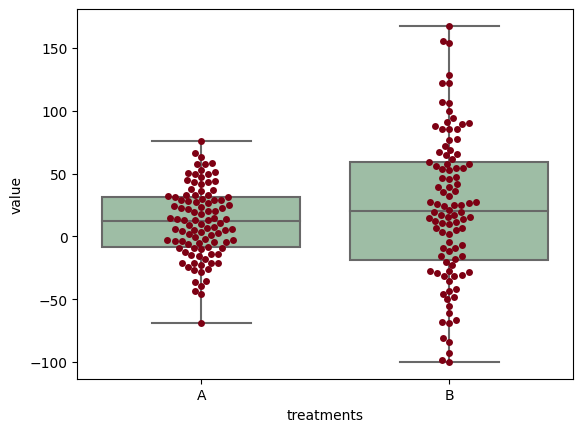

In [ ]:
ax = sns.boxplot(x='treatments', y='value', data=df_melt, color='#99c2a2')
ax = sns.swarmplot(x="treatments", y="value", data=df_melt, color='#7d0013')
plt.show()

In [ ]:
import scipy.stats as stats

fvalue, pvalue = stats.ttest_ind(recovery['A'], recovery['B'])

print('Статистика=%.3f, p=%.6f' % (fvalue, pvalue))
if pvalue > 0.05:
    print('Не отклоняем нулевую гипотезу, средние, вероятно, одинаковые')
else:
    print('Отклоняем нулевую гипотезу, средние, вероятно, различаются')

Статистика=-1.734, p=0.084510
Не отклоняем нулевую гипотезу, средние, вероятно, одинаковые


Значит, существенной разницы между препаратами нет, предположим мы

##### Задание № 2
Допустим, вы решили устроить дачный эксперимент. Берем и поливаем одни огурцы водой, другие огурцы — водой с удобнением, третью группу огурцов будем поливать минералкой. 
    
 - Используя дисперсионный анализ, сделайте выводы о распредлениях результатов. Есть ли эффект от удобрения по сравнению с минералкой? 
 - Помимо результата статистического теста, продемонстрируйте отличия визуально с помощью `boxplot` или `hist`
    
`water = [1,2,3,4,2,4,2,4,5,2,3,4,2,1,3,4,3,2,5,1]`

`nutri = [1,2,4,6,5,6,7,5,4,5,6,7,4,3,5,5,6,5,4,3,5]`

`mineral =[2,1,1,3,2,4,2,4,5,4,3,2,3,2,3,1,3,4,5,1,4]`

In [ ]:
water = [1,2,3,4,2,4,2,4,5,2,3,4,2,1,3,4,3,2,5,1]
nutri = [1,2,4,6,5,6,7,5,4,5,6,7,4,3,5,5,6,5,4,3,5]
mineral =[2,1,1,3,2,4,2,4,5,4,3,2,3,2,3,1,3,4,5,1,4]

#превратим набор списков в датафрейм

df1 = pd.DataFrame({'water': pd.Series(water), 'nutri': pd.Series(nutri), 'mineral': pd.Series(mineral)})
df1

,water,nutri,mineral
0,1.0,1,2
1,2.0,2,1
2,3.0,4,1
3,4.0,6,3
4,2.0,5,2
5,4.0,6,4
6,2.0,7,2
7,4.0,5,4
8,5.0,4,5
9,2.0,5,4


In [ ]:
#переделаем датафрецм в более наглядный вид с помощью melt
df_melt = pd.melt(df1.reset_index(), id_vars=['index'], value_vars=['water', 'nutri', 'mineral'])
df_melt.columns = ['index', 'treatments', 'value']
df_melt

,index,treatments,value
0,0,water,1.0
1,1,water,2.0
2,2,water,3.0
3,3,water,4.0
4,4,water,2.0
...,...,...,...
58,16,mineral,3.0
59,17,mineral,4.0
60,18,mineral,5.0
61,19,mineral,1.0


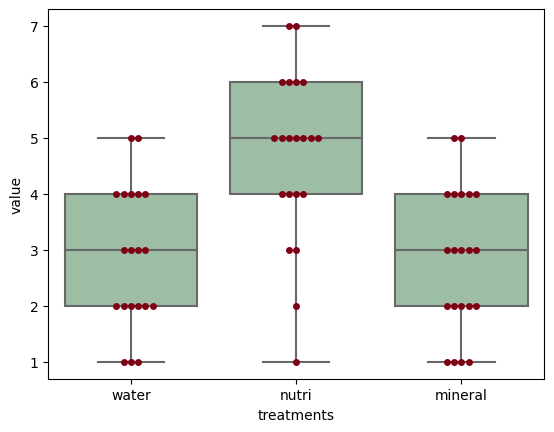

In [ ]:
#визуализируем данные
ax = sns.boxplot(x='treatments', y='value', data=df_melt, color='#99c2a2')
ax = sns.swarmplot(x="treatments", y="value", data=df_melt, color='#7d0013')
plt.show()

In [ ]:
#видим разницу между удобрениями и водой, минералкой


#теперь сделаем статистический тест
import scipy.stats as stats

fvalue, pvalue = stats.f_oneway(df1['water'], df1['nutri'], df1['mineral'])

print('Статистика=%.3f, p=%.6f' % (fvalue, pvalue))
if p > 0.05:
    print('Не отклоняем нулевую гипотезу, средние, вероятно, одинаковые')
else:
    print('Отклоняем нулевую гипотезу, средние, вероятно, различаются')

Статистика=nan, p=nan
Отклоняем нулевую гипотезу, средние, вероятно, различаются


так как есть статистически значимая разница в данных, то предполагаем, что удобрения более эффективны, чем минералка и вода

In [ ]:
df1.head()

,water,nutri,mineral
0,1.0,1,2
1,2.0,2,1
2,3.0,4,1
3,4.0,6,3
4,2.0,5,2


### Блок 2
#### Cookie Cats

Cookie Cats — чрезвычайно популярная мобильная игра, разработанная Tactile Entertainment. Это классическая игра-головоломка в стиле «соедините три», в которой игрок должен соединять плитки одного цвета, чтобы очистить поле и выиграть уровень. Здесь также есть поющие кошки.

По мере прохождения уровней игроки время от времени сталкиваются с воротами, которые заставляют их ждать или совершать покупки в приложении, чтобы продолжить. Помимо стимулирования покупок в приложении, эти ворота дают игрокам вынужденный перерыв в игре, что, как мы надеемся, приведёт к увеличению времени, проведённому в игре, и продлению удовольствия от игры.

<b>Но где ставить ворота? </b>
Изначально первые ворота были размещены на уровне `30`. В этом проекте вам предлагается проанализировать A/B-тест, в котором создатели переместили первые ворота в Cookie Cats с `30` уровня на уровень `40`. В частности, вам надо рассмотреть влияние A/B-теста на удержание игроков.

In [ ]:
cookie_cats = 'https://raw.githubusercontent.com/a-milenkin/datasets_for_t-tests/main/cookie_cats.csv'

data = pd.read_csv(cookie_cats, error_bad_lines=False)  # Откроем датасет
data.head()

<ipython-input-12-e392f90565af>:3: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  data = pd.read_csv(cookie_cats, error_bad_lines=False)  # Откроем датасет


,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


**Данные получены от 90 189 игроков, которые установили игру во время проведения A/B-теста. Переменные:**

* `userid` - уникальный номер, идентифицирующий каждого игрока.
* `version` - был ли игрок помещён в контрольную группу (gate_30 - ворота на уровне 30) или в тестовую группу (gate_40 - ворота на уровне 40).
* `sum_gamerounds` - количество игровых раундов, сыгранных игроком в течение первой недели после установки
* `retention_1` - игрок вернулся и поиграл через 1 день после установки?
* `retention_7` - игрок вернулся и играл через 7 дней после установки?

Когда игрок устанавливал игру, ему случайным образом назначали `gate_30` или `gate_40`.

#### Задание: провести анализ данных и сделать выводы о лучшем месте для установки ворот.
    
**Замечание:** приведённых вспомогательных фрагментов кода не хватает для ответа на вопрос. 

Делать выводы необходимо, опираясь на статистические тесты, разобранные в лекции. 

Большим плюсом будет построение визуализиции для подтверждения ваших выводов. Рекомендуем использовать `seaborn` c его `sns.boxplot`/`sns.carplot`, `sns.barplot`, но можно обойтись и `matplotlib`

In [ ]:
#Сгрупируем результаты теста по версиям игры.
data.groupby('version').count()

,userid,sum_gamerounds,retention_1,retention_7
version,,,,
gate_30,44700,44700,44700,44700
gate_40,45489,45489,45489,45489


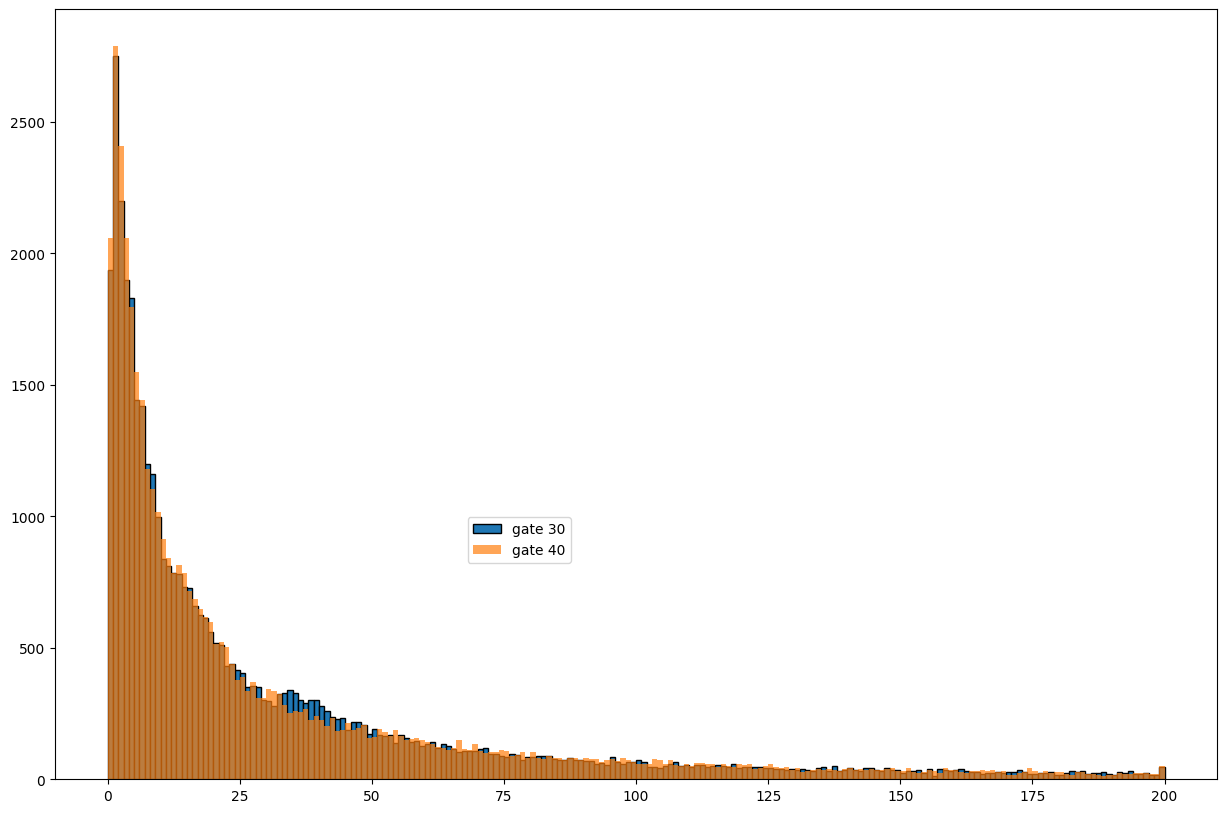

In [ ]:
v_30 = data.loc[data.version == 'gate_30']
v_40 = data.loc[data.version == 'gate_40']
v_30 = v_30.drop(v_30.loc[v_30.sum_gamerounds > 200].index)
v_40 = v_40.drop(v_40.loc[v_40.sum_gamerounds > 200].index)


bins = 200
plt.figure(figsize=(15, 10))
plt.hist(v_30['sum_gamerounds'], bins=bins, alpha=1, edgecolor='black', label='gate 30')
plt.hist(v_40['sum_gamerounds'], bins=bins, alpha=0.7, label='gate 40')
plt.legend(loc='upper right', bbox_to_anchor=(0.45, 0.35))
plt.show()

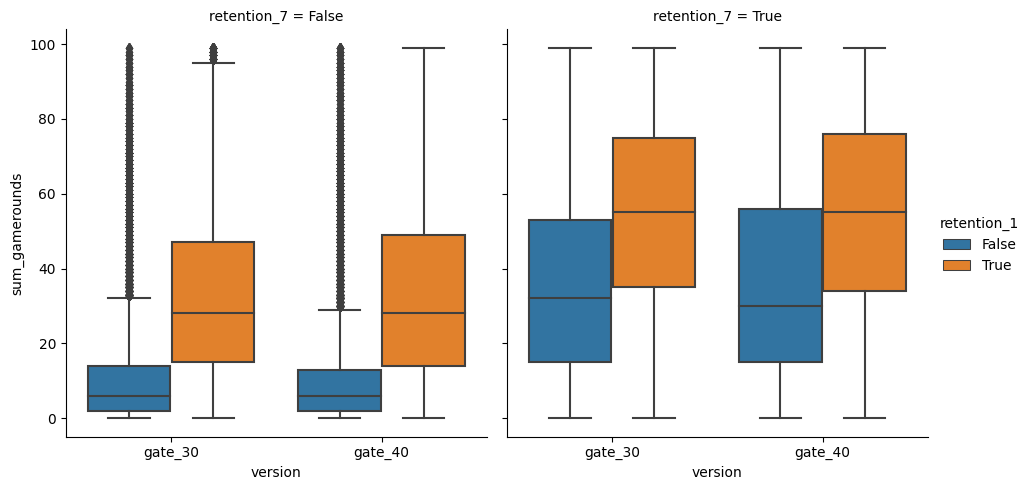

In [ ]:
df = data.loc[data['sum_gamerounds'] < 100].copy();


sns.catplot(x="version", y="sum_gamerounds",
            hue="retention_1", col = 'retention_7',
            data=df, kind="box",
            height=5, aspect=.95);


<Axes: ylabel='Density'>

<Figure size 1500x1000 with 0 Axes>

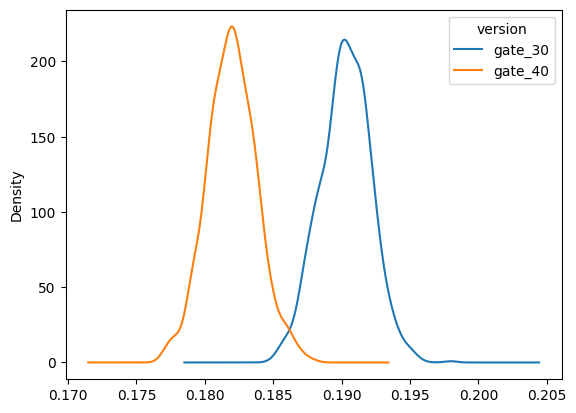

In [ ]:
#Если вдруг оказалось сложно, то вот ещё один способ визуализации различий
plt.figure(figsize=(15, 10))

boot_1d = []
for i in range(1000):
    boot_mean = data.sample(frac = 1, replace = True).groupby('version')['retention_7'].mean()  #retention_1
    boot_1d.append(boot_mean)
    
# Преобразование списка в DataFrame
boot_1d = pd.DataFrame(boot_1d)
boot_1d.plot(kind='density')

In [ ]:
from scipy.stats import f_oneway 
from scipy.stats import wilcoxon
from scipy.stats import mannwhitneyu
import scipy.stats as stats

f, p = f_oneway(data[data['version'] == 'gate_30']['sum_gamerounds'], data[data['version'] == 'gate_40']['sum_gamerounds'])
f, p
stat, p = mannwhitneyu(data[data['version'] == 'gate_30']['sum_gamerounds'], data[data['version'] == 'gate_40']['sum_gamerounds'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

if p > 0.05:
    print('Не отклоняем нулевую гипотезу, распределения, вероятно, одинаковые')
else:
    print('Отклоняем нулевую гипотезу, распределения, вероятно, различаются')

Statistics=1024331250.500, p=0.050
Не отклоняем нулевую гипотезу, средние, вероятно, одинаковые


<Axes: ylabel='Density'>

<Figure size 1500x1000 with 0 Axes>

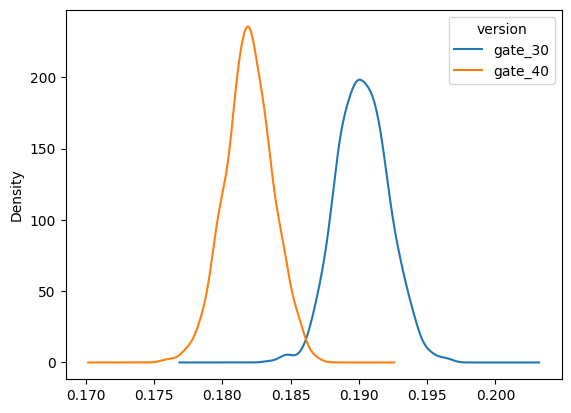

In [ ]:
plt.figure(figsize=(15, 10))
# boot_1d - собираем статистику по средним, для неё можно применить t-тест
boot_1d = []
for i in range(1000):
    boot_mean = data.sample(frac=1, replace=True).groupby(
        'version')['retention_7'].mean()  # retention_1
    boot_1d.append(boot_mean)

# Преобразование списка в DataFrame
boot_1d = pd.DataFrame(boot_1d)

# График полученного распределения
boot_1d.plot(kind='density')

In [ ]:
#прежде чем использовать t-тест, необходимо проверить равенство дисперссий
def f_test(group1, group2):
    f = np.var(group1, ddof=1)/np.var(group2, ddof=1)
    nun = group1.size-1
    dun = group2.size-1
    p_value = 1-st.f.cdf(f, nun, dun)
    return f, p_value

In [ ]:
stat, p = f_test(boot_1d['gate_30'], boot_1d['gate_40'])

print('Статистика=%.3f, p=%.5f' % (stat, p))

if p > 0.05:
    print('Не отклоняем нулевую гипотезу, дисперссии, вероятно, одинаковые')
else:
    print('Отклоняем нулевую гипотезу, дисперссии, вероятно, различаются')

Статистика=1.182, p=0.00409
Отклоняем нулевую гипотезу, дисперссии, вероятно, различаются


In [ ]:
stat, p = st.ttest_ind(boot_1d['gate_30'], boot_1d['gate_40'])
print('Статистика=%.3f, p=%.10f' % (stat, p))

if p > 0.05:
    print('Не отклоняем нулевую гипотезу, средние, вероятно, одинаковые')
else:
    print('Отклоняем нулевую гипотезу, средние, вероятно, различаются')

Статистика=101.479, p=0.0000000000
Отклоняем нулевую гипотезу, средние, вероятно, различаются


Наше значение $p$ близко к нулю, поэтому мы отвергаем нулевую гипотезу о том, что средние значения двух выборок одинаковые. То есть существует статистически значимая разница между тем где поставить ворота

### Блок 3
#### Покемоны и A/B-тестирование

Покемоны — это маленькие существа, которые сражаются друг с другом на соревнованиях. Все покемоны имеют разные характеристики (сила атаки, защиты и т. д.) и относятся к одному или двум так называемым классам (вода, огонь и т. д.).

Профессор Оук является изобретателем Pokedex, портативного устройства, которое хранит информацию обо всех существующих покемонах. Как его ведущий специалист по данным, Вы только что получили от него запрос с просьбой осуществить аналитику данных на всех устройствах Pokedex. 

**Описание набора данных**
Профессор Оук скопировал всё содержимое в память одного устройства Pokedex, в результате чего получился набор данных, с которым Вы будете работать в этой задаче. В этом файле каждая строка представляет характеристики одного покемона:

* `pid`: Numeric - ID покемона
* `HP`: Numeric - Очки здоровья
* `Attack`: Numeric - Сила обычной атаки
* `Defense`: Numeric - Сила обычной защиты
* `Sp. Atk`: Numeric - Сила специальной атаки
* `Sp. Def`: Numeric - Сила специальной защиты
* `Speed`: Numeric - Скорость движений
* `Legendary`: Boolean - «True», если покемон редкий
* `Class 1`: Categorical - Класс покемона
* `Class 2`: Categorical - Класс покемона

**Обратите внимание, что у покемона может быть один или два класса. Если у покемона два класса, считается, что они имеют одинаковую значимость.**

In [ ]:
# Откроем датасет

pokemon_path = 'https://raw.githubusercontent.com/a-milenkin/datasets_for_t-tests/main/pokemon.csv'
pokemon = pd.read_csv(pokemon_path, error_bad_lines=False)
pokemon.head()

<ipython-input-3-1e6d6fedfab1>:4: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  pokemon = pd.read_csv(pokemon_path, error_bad_lines=False)


,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,False


**Задание № 1**
    
Профессор Оук подозревает, что покемоны в классе `grass` имеют более сильную обычную атаку, чем покемоны в классе `rock`. Проверьте, прав ли он, и убедите его в своём выводе статистически.
    
Примечание: 
- покемоны, которые относятся к обоим классам, не должны входить в выборку;
- Вы можете предположить, что распределение обычных атак является нормальным для всех классов покемонов.

In [ ]:
#отберем нужные нам столбцы
atta_pok = pokemon[['Class 1', 'Class 2', 'Attack']]
atta_pok

,Class 1,Class 2,Attack
0,Grass,Poison,49
1,Grass,Poison,62
2,Grass,Poison,82
3,Grass,Poison,100
4,Fire,NaN,52
...,...,...,...
795,Rock,Fairy,100
796,Rock,Fairy,160
797,Psychic,Ghost,110
798,Psychic,Dark,160


In [ ]:
#теперь отсеем тех покемонов которые принадлежат к двум классам сразу

#перед этим создадим списки куда будем вкладывать значения атаки двух классов покемонов
grass_list = []
rock_list = []

#отссеваем ненужных покемонов и добавляем значения атак в списки
def check_class_and_attack(pokemo):
  if pokemo['Class 1'] == 'Grass' or pokemo['Class 2'] == 'Grass':
    if pokemo['Class 1'] != 'Rock' or pokemo['Class 2'] != 'Rock':
      grass_list.append(pokemo['Attack'])
  elif pokemo['Class 1'] == 'Rock' or pokemo['Class 2'] == 'Rock':
    if pokemo['Class 1'] != 'Grass' or pokemo['Class 2'] != 'Grass':
      rock_list.append(pokemo['Attack'])

In [ ]:
#применяем функцию к датафрейму
atta_pok.apply(check_class_and_attack, axis=1)

0      None
1      None
2      None
3      None
4      None
       ... 
795    None
796    None
797    None
798    None
799    None
Length: 800, dtype: object

In [ ]:
print(rock_list) #проверяем

[80, 95, 120, 45, 85, 130, 40, 60, 80, 115, 105, 135, 100, 10, 50, 55, 64, 84, 134, 164, 45, 70, 90, 110, 55, 95, 95, 125, 90, 100, 125, 165, 42, 52, 80, 140, 55, 75, 105, 135, 65, 95, 78, 108, 112, 140, 129, 52, 105, 89, 121, 59, 77, 50, 100, 160]


In [ ]:
#теперь проводим статистический тест, используем критерий стьюдента (нормальные данные, две группы)
stat, p = stats.ttest_ind(grass_list, rock_list)

print(f"Статистика = {stat:.5f}, p = {p:.10f}")
if p > 0.05:
    print('Не отклоняем нулевую гипотезу, средние, вероятно, одинаковые')
else:
    print('Отклоняем нулевую гипотезу, средние, вероятно, различаются')

Статистика = -3.80802, p = 0.0002041962
Отклоняем нулевую гипотезу, средние, вероятно, различаются


In [ ]:
'''теперь сравним средние двух списков, чтобы понять, у каких покемонов сильнее атака
для этого импортируем mean'''
from statistics import mean
mean(grass_list)

73.46315789473684

In [ ]:
mean(rock_list)

91.78571428571429

Статистически значимая разница между данными есть. А на основании различия в средних двух списков можно предположить, что покемоны в классе rock имеют более сильную обычную атаку, чем покемоны в классе grass

**Задание № 2**
    
Профессор Оук уже долго не может спать по ночам, ведь его волнует вопрос: а правда ли, что покемоны в классе `Water` в среднем быстрее покемонов в классе `Normal`. 

Проверьте, прав ли он, и убедите его в своем выводе статистически.
    
Примечание: 
- покемоны, которые относятся к обоим классам, не должны входить в выборку;
- Вы можете предположить, что распределение обычных атак является нормальным для всех классов покемонов.

In [ ]:
pokemon.head()

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,False


In [ ]:
#отбираем нужные нам столбцы
pok_sp = pokemon[['Class 1', 'Class 2', 'Speed']]
pok_sp.head()

,Class 1,Class 2,Speed
0,Grass,Poison,45
1,Grass,Poison,60
2,Grass,Poison,80
3,Grass,Poison,80
4,Fire,NaN,65


In [ ]:
#теперь отсеем тех покемонов которые принадлежат к двум классам сразу

#перед этим создадим списки куда будем вкладывать значения скоростей двух классов покемонов
wat_list = []
nor_list = []

#отссеваем ненужных покемонов и добавляем значения скоростей в списки
def check_class_and_speed(pokem):
  if pokem['Class 1'] == 'Water' or pokem['Class 2'] == 'Water':
    if pokem['Class 1'] != 'Normal' or pokem['Class 2'] != 'Normal':
      wat_list.append(pokem['Speed'])
  elif pokem['Class 1'] == 'Normal' or pokem['Class 2'] == 'Normal':
    if pokem['Class 1'] != 'Water' or pokem['Class 2'] != 'Water':
      nor_list.append(pokem['Speed'])

In [ ]:
#применяем функцию к датафрейму
pok_sp.apply(check_class_and_speed, axis=1)

0      None
1      None
2      None
3      None
4      None
       ... 
795    None
796    None
797    None
798    None
799    None
Length: 800, dtype: object

In [ ]:
print(wat_list) #проверяем

[43, 58, 78, 78, 55, 85, 90, 90, 70, 70, 100, 15, 30, 30, 45, 70, 40, 70, 50, 75, 60, 85, 63, 68, 85, 115, 80, 81, 81, 60, 65, 35, 55, 55, 80, 43, 58, 78, 67, 67, 40, 50, 70, 15, 35, 30, 85, 35, 65, 45, 70, 85, 85, 40, 50, 60, 70, 30, 50, 70, 85, 65, 65, 65, 95, 105, 60, 60, 60, 60, 35, 55, 80, 81, 25, 45, 65, 32, 52, 52, 55, 97, 90, 90, 40, 50, 60, 71, 85, 115, 34, 39, 66, 91, 50, 86, 100, 80, 100, 45, 60, 70, 64, 101, 64, 69, 74, 98, 22, 32, 55, 98, 40, 60, 65, 108, 108, 71, 97, 122, 50, 68, 30, 44, 59, 70]


In [ ]:
#теперь проводим статистический тест, используем критерий стьюдента (нормальные данные, две группы)
stat, p = stats.ttest_ind(wat_list, nor_list)

print(f"Статистика = {stat:.5f}, p = {p:.10f}")
if p > 0.05:
    print('Не отклоняем нулевую гипотезу, средние, вероятно, одинаковые')
else:
    print('Отклоняем нулевую гипотезу, средние, вероятно, различаются')

Статистика = -2.14508, p = 0.0330180551
Отклоняем нулевую гипотезу, средние, вероятно, различаются


In [ ]:
#смотрим средние значения в списках
mean(wat_list)

64.98412698412699

In [ ]:
mean(nor_list)

72.25742574257426

Провели тест, он показал статистически значимую разницу между списками. Но мы говорим о неверности гипотезы Оука на основе того, что покемоны в классе Normal в среднем быстрее покемонов в классе Water 

**Задание № 3:**
    
Профессор Оук тот еще безумец. Он изобрел сыворотку, способную ускорить покемона. 
Однако мы усомнились в эффективности его вакцины. Професоор дал эту сыворотку некоторым покемонам (массив `treathed_pokemon`). 
Проверьте, работает ли вообще его сыворотка, и убедите всех в своем выводе статистически.
    
    
*Вы можете предположить, что распределение скорости движения является нормальным для всех классов покемонов.*

In [ ]:
# Покемоны, которые принимали сыворотку
treathed_pokemon = ['Mega Beedrill','Mega Alakazam', 'Deoxys Normal Forme', 'Mega Lopunny']

In [ ]:
pokemon.head()

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,False


In [ ]:
#нам надо сравнить скорость покемонов с сывороткой и без нее

#надо сделать 1 список где будут скорости обычных п. и 2 список где будут скорости п. с сывороткой

#сначала оставим только нужные нам колонки
spee_p = pokemon[['Name','Speed']]
spee_p

,Name,Speed
0,Bulbasaur,45
1,Ivysaur,60
2,Venusaur,80
3,Mega Venusaur,80
4,Charmander,65
...,...,...
795,Diancie,50
796,Mega Diancie,110
797,Hoopa Confined,70
798,Hoopa Unbound,80


In [ ]:
speeds = []
spec_speeds = []

def special_poks(pok):
  if pok['Name'] in treathed_pokemon:
    spec_speeds.append(pok['Speed'])
  else:
    speeds.append(pok['Speed'])

In [ ]:
spee_p.apply(special_poks, axis=1)

0      None
1      None
2      None
3      None
4      None
       ... 
795    None
796    None
797    None
798    None
799    None
Length: 800, dtype: object

In [ ]:
print(spec_speeds)

[145, 150, 150, 135]


In [ ]:
print(speeds)

[45, 60, 80, 80, 65, 80, 100, 100, 100, 43, 58, 78, 78, 45, 30, 70, 50, 35, 75, 56, 71, 101, 121, 72, 97, 70, 100, 55, 80, 90, 110, 40, 65, 41, 56, 76, 50, 65, 85, 35, 60, 65, 100, 20, 45, 55, 90, 30, 40, 50, 25, 30, 45, 90, 95, 120, 90, 115, 55, 85, 70, 95, 60, 95, 90, 90, 70, 90, 105, 120, 35, 45, 55, 40, 55, 70, 70, 100, 20, 35, 45, 90, 105, 15, 30, 30, 45, 70, 60, 75, 100, 45, 70, 25, 50, 40, 70, 80, 95, 110, 130, 70, 42, 67, 50, 75, 100, 140, 40, 55, 35, 45, 87, 76, 30, 35, 60, 25, 40, 50, 60, 90, 100, 60, 85, 63, 68, 85, 115, 90, 105, 95, 105, 93, 85, 105, 110, 80, 81, 81, 60, 48, 55, 65, 130, 65, 40, 35, 55, 55, 80, 130, 150, 30, 85, 100, 90, 50, 70, 80, 130, 130, 140, 100, 45, 60, 80, 65, 80, 100, 43, 58, 78, 20, 90, 50, 70, 55, 85, 30, 40, 130, 67, 67, 60, 15, 15, 20, 40, 70, 95, 35, 45, 55, 45, 50, 40, 50, 30, 70, 50, 80, 110, 85, 30, 30, 95, 15, 35, 110, 65, 91, 30, 85, 48, 33, 85, 15, 40, 45, 85, 30, 30, 30, 45, 85, 65, 75, 5, 85, 75, 115, 40, 55, 20, 30, 50, 50, 35, 65, 45

In [ ]:
stat, p = stats.ttest_ind(spec_speeds, speeds)

print(f"Статистика = {stat:.5f}, p = {p:.10f}")
if p > 0.05:
    print('Не отклоняем нулевую гипотезу, средние, вероятно, одинаковые')
else:
    print('Отклоняем нулевую гипотезу, средние, вероятно, различаются')

Статистика = 5.38541, p = 0.0000000952
Отклоняем нулевую гипотезу, средние, вероятно, различаются


In [ ]:
mean(spec_speeds)

145

In [ ]:
mean(speeds)

67.89195979899498

Если есть статистически значимая разница в скоростях, то можно подытожить, что сыворотка работает. Более того, среднее spec_speeds больше среднего speeds, что подтверждает наше предположение

**Задание № 4**
    
Профессор Оук всегда любил истории про легендарных покемонов. Однако профессор не очень уверен, что они лучше остальных покемонов. 
Оук предложил разобраться в этом Вам. 

Действительно ли сумма характеристик `HP`, `Attack`, `Defense` у легендарных покемонов выше, чем у других покемонов? А произведение этих же параметров? 

Найдите ответы на эти вопросы и убедите всех в своем выводе статистически.

*Вы можете предположить, что распределение сум и произведений этих параметров является нормальным для всех классов покемонов.*

In [ ]:
pokemon.head()

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,False


In [ ]:
#оставим нужные нам столбики
leg_noleg = pokemon[['Legendary', 'HP', 'Attack', 'Defense']]
leg_noleg.head()

,Legendary,HP,Attack,Defense
0,False,45,49,49
1,False,60,62,63
2,False,80,82,83
3,False,80,100,123
4,False,39,52,43


In [ ]:
#для начала возьмем характеристику hp
leg_hp = []
noleg_hp = []

#создаем функцию которая будет разделять лег. и нелег. покемонов
def define_hp(po):
  if po['Legendary'] == False:
    noleg_hp.append(po['HP'])
  else:
    leg_hp.append(po['HP'])

#применяем функцию к датафрейму
leg_noleg.apply(define_hp, axis=1)
print(leg_hp) #проверяем

[90, 90, 90, 106, 106, 106, 90, 115, 100, 106, 106, 80, 80, 80, 80, 80, 80, 80, 100, 100, 100, 100, 105, 105, 100, 50, 50, 50, 50, 75, 80, 75, 100, 90, 91, 110, 150, 150, 70, 100, 100, 120, 100, 91, 91, 91, 79, 79, 79, 79, 100, 100, 89, 89, 125, 125, 125, 126, 126, 108, 50, 50, 80, 80, 80]


In [ ]:
#теперь берем attack
leg_att = []
noleg_att = []

#создаем функцию которая будет разделять лег. и нелег. покемонов
def define_att(po2):
  if po2['Legendary'] == False:
    noleg_att.append(po2['Attack'])
  else:
    leg_att.append(po2['Attack'])

#применяем функцию к датафрейму
leg_noleg.apply(define_att, axis=1)
print(leg_att) #проверяем

[85, 90, 100, 110, 190, 150, 85, 115, 75, 90, 130, 100, 50, 75, 80, 100, 90, 130, 100, 150, 150, 180, 150, 180, 100, 150, 180, 70, 95, 75, 105, 125, 120, 120, 90, 160, 100, 120, 90, 100, 103, 120, 100, 90, 129, 90, 115, 100, 115, 105, 120, 150, 125, 145, 130, 170, 120, 131, 131, 100, 100, 160, 110, 160, 110]


In [ ]:
#и осталось Defense

leg_de = []
noleg_de = []

#создаем функцию которая будет разделять лег. и нелег. покемонов
def define_de(po3):
  if po3['Legendary'] == False:
    noleg_de.append(po3['Defense'])
  else:
    leg_de.append(po3['Defense'])

#применяем функцию к датафрейму
leg_noleg.apply(define_de, axis=1)
print(leg_de) #проверяем

[100, 85, 90, 90, 100, 70, 75, 85, 115, 130, 90, 200, 100, 150, 90, 120, 80, 100, 90, 90, 140, 160, 90, 100, 100, 50, 20, 160, 90, 130, 105, 70, 120, 100, 106, 110, 120, 100, 90, 100, 75, 120, 100, 129, 90, 72, 70, 80, 70, 70, 100, 120, 90, 90, 90, 100, 90, 95, 95, 121, 150, 110, 60, 60, 120]


In [ ]:
#теперь узнаем сумму характеристик каждый группы покемонов, сложив между собой средние для каждой характеристики

#сумма хар-к обычных покемонов
from statistics import mean
sum_features_ordinary_p = mean(noleg_hp) + mean(noleg_att) + mean(noleg_de)
sum_features_ordinary_p

214.4108843537415

In [ ]:
#сумма хар-к легендарных покемонов

sum_features_leg_p = mean(leg_hp) + mean(leg_att) + mean(leg_de)
sum_features_leg_p

309.07692307692304

In [ ]:
#теперь с помощью статистического теста проверим разницу между суммами

stat, p = stats.ttest_1samp(a = (leg_hp + leg_att + leg_de), popmean = sum_features_ordinary_p)
print(f'Статистика = {stat:.3f}, p = {p:.3f}')
if p > 0.05:
  print('Легендарные покемоны в среднем, вероятно, не сильнее обычных')
else:
  print('Легендарные покемоны в среднем, вероятно, сильнее обычных') 

Статистика = -54.167, p = 0.000
Легендарные покемоны в среднем, вероятно, сильнее обычных


In [ ]:
#теперь сделаем то же самое при проверке умножения
mult_features_ordinary_p = mean(noleg_hp) * mean(noleg_att) * mean(noleg_de)
mult_features_ordinary_p

363781.449577234

In [ ]:
mult_features_leg_p = mean(leg_hp) * mean(leg_att) * mean(leg_de)
mult_features_leg_p

1078381.5321110606

In [ ]:
#для операции умножения превратим списки в array
import numpy as np
ar1 = np.array(leg_hp)
ar2 = np.array(leg_att)
ar3 = np.array(leg_de)

In [ ]:
stat, p = stats.ttest_1samp(a = (ar1 * ar2 * ar3), popmean = mult_features_ordinary_p)
print(f'Статистика = {stat:.3f}, p = {p:.3f}')
if p > 0.05:
  print('Легендарные покемоны в среднем, вероятно, не сильнее обычных')
else:
  print('Легендарные покемоны в среднем, вероятно, сильнее обычных') 

Статистика = 11.262, p = 0.000
Легендарные покемоны в среднем, вероятно, сильнее обычных


Итак, мы убедились, что между характеристиками есть статистически значимая разница. При этом сумма характеристик легендарных покемонов выше, чем сумма характеристик обычных. То же самое касается произведения характеристик

**Задание № 5**
    
Профессор Оук частенько наблюдает за боями покемонов. После очередных таких боев Оук выделил три класса (массив `best_defence_class`), которые на его взгляд одинаковы по "силе обычной защиты" `Defense`. 

Проверьте, действительно ли эти классы покемонов не отличаются по уровню защиты статистически значимо. Все та же статистика Вам в помощь! 

*Вы можете предположить, что распределение сум и произведений этих параметров является нормальным для всех классов покемонов.*

In [ ]:
best_defence_class = ['Rock', 'Ground','Steel','Ice']

In [ ]:
pokemon.head()

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,False


In [ ]:
pok_def = pokemon[['Class 1', 'Class 2', 'Defense']]
pok_def.head()

,Class 1,Class 2,Defense
0,Grass,Poison,49
1,Grass,Poison,63
2,Grass,Poison,83
3,Grass,Poison,123
4,Fire,NaN,43


In [ ]:
#создадим списки куда будем вкладывать все соответсвующие значения defense
list_rock = []
list_ground = []
list_steel = []
list_ice = []

#создаем функцию которая будет определять к какому списку принадлежит покемон
def check_classes(poke):
  if poke['Class 1'] == best_defence_class[0] or poke['Class 2'] == best_defence_class[0]:
    list_rock.append(poke['Defense'])
  elif poke['Class 1'] == best_defence_class[1] or poke['Class 2'] == best_defence_class[1]:
    list_ground.append(poke['Defense'])
  elif poke['Class 1'] == best_defence_class[2] or poke['Class 2'] == best_defence_class[2]:
    list_steel.append(poke['Defense'])
  elif poke['Class 1'] == best_defence_class[3] or poke['Class 2'] == best_defence_class[3]:
    list_ice.append(poke['Defense'])

In [ ]:
pok_def.apply(check_classes, axis=1) #применим функцию ко всему датафрейму

0      None
1      None
2      None
3      None
4      None
       ... 
795    None
796    None
797    None
798    None
799    None
Length: 800, dtype: object

In [ ]:
print(list_ground) #проверяем

[85, 110, 87, 77, 25, 50, 95, 110, 45, 85, 105, 200, 230, 40, 80, 60, 120, 70, 90, 110, 90, 40, 70, 100, 45, 50, 80, 43, 73, 55, 105, 140, 160, 105, 105, 68, 45, 65, 95, 115, 78, 118, 125, 80, 40, 60, 55, 75, 35, 45, 80, 84, 50, 80, 90, 90, 77, 121]


In [ ]:
fvalue, pvalue = stats.f_oneway(list_rock, list_ground, list_steel, list_ice) #теперь проводим тест используя f_oneway и делаем межгрупповой анализ

print('Статистика=%.3f, p=%.6f' % (fvalue, pvalue))
if p > 0.05:
    print('Не отклоняем нулевую гипотезу, средние, вероятно, одинаковые')
else:
    print('Отклоняем нулевую гипотезу, средние, вероятно, различаются')

Статистика=7.951, p=0.000051
Отклоняем нулевую гипотезу, средние, вероятно, различаются


Суждение Оука ошибочно, между покемонами есть статистически важные различия в плане defense